# Importing the Libraries

In [94]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [67]:
credit_card_data = pd.read_csv("creditcard.csv")

# Raed first 5 rows of the dataset

In [68]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [69]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1986 non-null   int64  
 1   V1      1986 non-null   float64
 2   V2      1986 non-null   float64
 3   V3      1986 non-null   float64
 4   V4      1986 non-null   float64
 5   V5      1986 non-null   float64
 6   V6      1986 non-null   float64
 7   V7      1986 non-null   float64
 8   V8      1986 non-null   float64
 9   V9      1986 non-null   float64
 10  V10     1986 non-null   float64
 11  V11     1986 non-null   float64
 12  V12     1986 non-null   float64
 13  V13     1986 non-null   float64
 14  V14     1985 non-null   float64
 15  V15     1985 non-null   float64
 16  V16     1985 non-null   float64
 17  V17     1985 non-null   float64
 18  V18     1985 non-null   float64
 19  V19     1985 non-null   float64
 20  V20     1985 non-null   float64
 21  V21     1985 non-null   float64
 22  

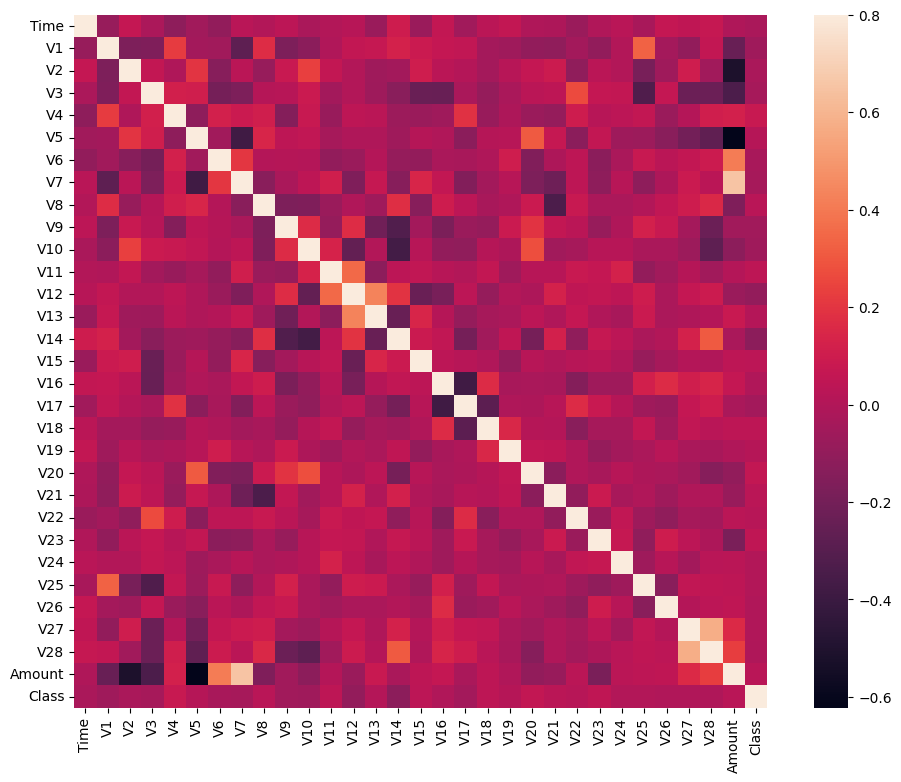

In [96]:
#The correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction.
corrmat=credit_card_data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax= .8, square=True)
plt.show()

In [70]:
credit_card_data.shape

(1986, 31)

In [71]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [72]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0.0    1983
1.0       2
Name: Class, dtype: int64

0 --> Normal Transaction

1 --> fraudulent transaction

# separating the data for analysis

In [73]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [74]:
print(legit.shape)
print(fraud.shape)

(1983, 31)
(2, 31)


In [75]:
legit.Amount.describe()

count    1983.000000
mean       68.404892
std       241.572682
min         0.000000
25%         4.950000
50%        15.090000
75%        63.285000
max      7712.430000
Name: Amount, dtype: float64

In [76]:
fraud.Amount.describe()

count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: Amount, dtype: float64

In [77]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,760.974786,-0.281494,0.267200,0.848906,0.146804,-0.077904,0.051713,0.139533,-0.059771,0.014492,...,0.056618,-0.012217,-0.144666,-0.043548,0.013865,0.108318,0.049441,0.027220,-0.001966,68.404892
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

In [78]:
legit_sample = legit.sample(n=2)

In [79]:
# Concatenating two DataFrames
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [80]:
# Raed first 5 rows of the dataset
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
344,252,-2.395434,-1.545369,1.919391,1.062514,-0.627806,1.154561,-0.861501,1.089486,-1.341268,...,-0.120569,-0.473853,0.453082,-0.323900,0.105117,-0.219200,0.261789,-0.122954,231.71,0.0
730,550,-0.371258,2.148826,-2.564546,1.807136,0.475460,-1.521838,-0.661011,-2.438627,-0.551395,...,-1.388885,0.180089,0.571906,-0.007535,-0.493312,-0.413732,0.011436,-0.052107,2.99,0.0
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0


In [81]:
new_dataset['Class'].value_counts()

0.0    2
1.0    2
Name: Class, dtype: int64

In [82]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,401.0,-1.383346,0.301728,-0.322577,1.434825,-0.076173,-0.183638,-0.761256,-0.674570,-0.946331,...,0.506700,-0.754727,-0.146882,0.512494,-0.165718,-0.194098,-0.316466,0.136612,-0.087530,117.35
1.0,439.0,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.50


# Splitting the data into Features & Targets



In [86]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [87]:
print(X)

     Time        V1        V2        V3        V4        V5        V6  \
344   252 -2.395434 -1.545369  1.919391  1.062514 -0.627806  1.154561   
730   550 -0.371258  2.148826 -2.564546  1.807136  0.475460 -1.521838   
541   406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623   472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   

           V7        V8        V9  ...       V20       V21       V22  \
344 -0.861501  1.089486 -1.341268  ...  0.561230 -0.120569 -0.473853   
730 -0.661011 -2.438627 -0.551395  ...  0.452169 -1.388885  0.180089   
541 -2.537387  1.391657 -2.770089  ...  0.126911  0.517232 -0.035049   
623  0.325574 -0.067794 -0.270953  ...  2.102339  0.661696  0.435477   

          V23       V24       V25       V26       V27       V28  Amount  
344  0.453082 -0.323900  0.105117 -0.219200  0.261789 -0.122954  231.71  
730  0.571906 -0.007535 -0.493312 -0.413732  0.011436 -0.052107    2.99  
541 -0.465211  0.320198  0.044519  0.177840  0.2611

In [88]:
print(Y)

344    0.0
730    0.0
541    1.0
623    1.0
Name: Class, dtype: float64


# Split the data into Training data & Testing Data

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(4, 30) (2, 30) (2, 30)


# Model Trainning with Logistic Regression

In [90]:
model = LogisticRegression()

In [91]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

In [92]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [43]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [44]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [45]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.5


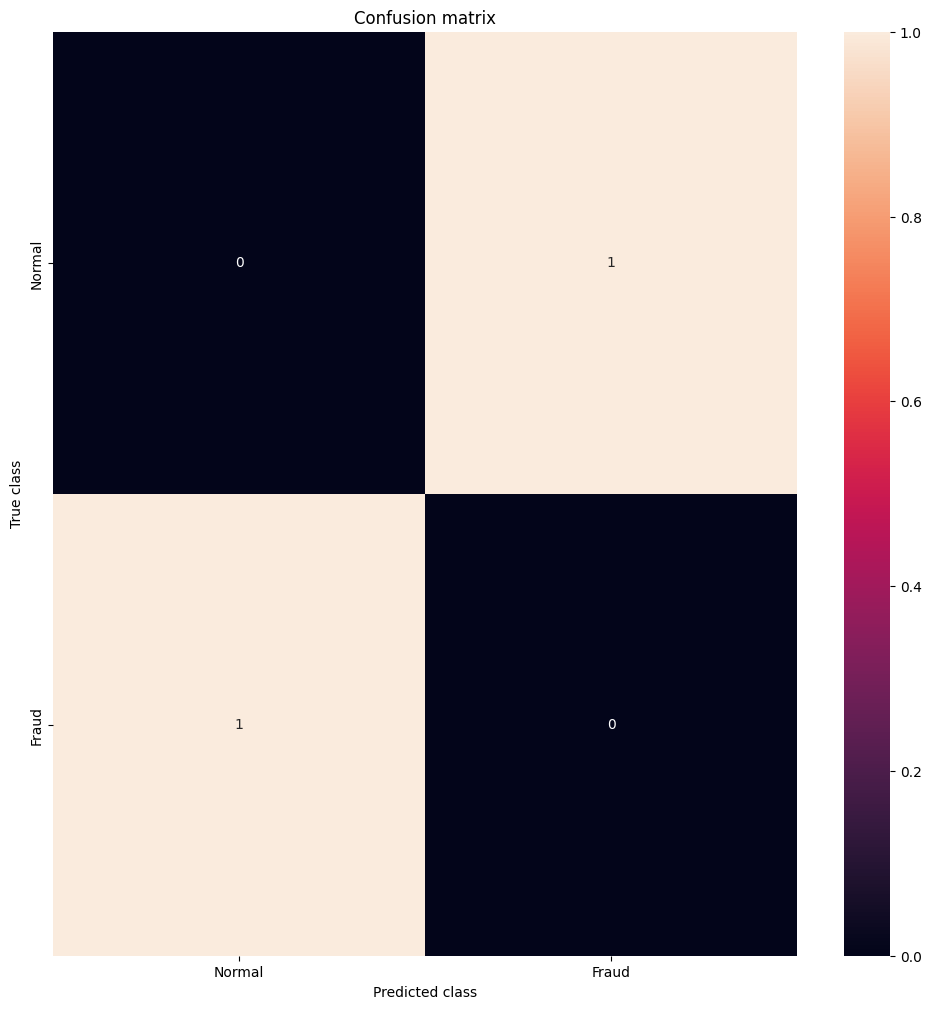

In [95]:
LABELS = ['Normal', 'Fraud']
con=confusion_matrix(Y_test,X_train_prediction)
plt.figure(figsize=(12,12))
sns.heatmap(con, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
